## Tutorial

We'll show here how to explain molecular property prediction tasks without access to the gradients or any properties of a molecule. To set-up this activity, we need a black box model. We'll use something simple here -- the model is classifier that says if a molecule as an alcohol (1) or not (0). Let's implement this model first

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

# set-up rdkit drawing preferences
IPythonConsole.ipython_useSVG = True
IPythonConsole.drawOptions.drawMolsSameScale = False

def model(smiles):
    mol = Chem.MolFromSmiles(smiles)
    match = mol.GetSubstructMatches(Chem.MolFromSmarts('[O;!H0]'))
    return 1 if match else 0

Let's now try it out on some molecules

f(s) 1


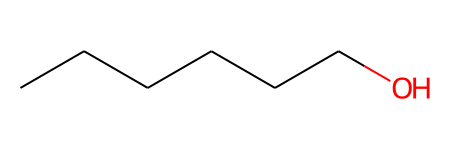

In [2]:
smi = 'CCCCCCO'
print('f(s)', model(smi))
Chem.MolFromSmiles(smi)

f(s) 1


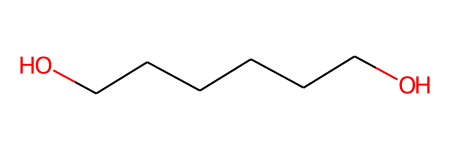

In [3]:
smi = 'OCCCCCCO'
print('f(s)', model(smi))
Chem.MolFromSmiles(smi)

f(s) 0


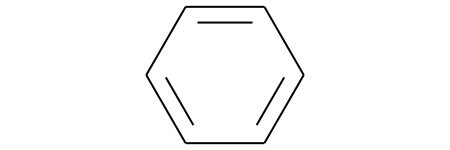

In [4]:
smi = 'c1ccccc1'
print('f(s)', model(smi))
Chem.MolFromSmiles(smi)

### Counterfacutal explanations

Let's now explain the model - pretending we don't know how it works - using counterfactuals

In [5]:
import exmol

instance = 'CCCCCCO'
space = exmol.sample_space(instance, model, batched=False)

ðŸ¤˜DoneðŸ¤˜: 100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 689.0/689 [00:00<00:00, 4014.38it/s]


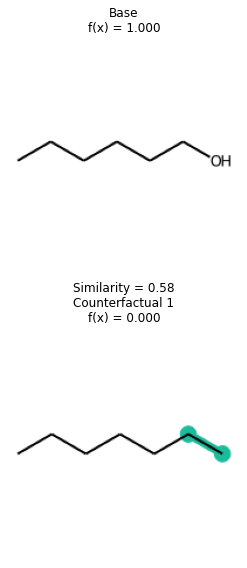

In [18]:
cfs = exmol.cf_explain(space, 1)
exmol.plot_cf(cfs)

We can see that removing the alcohol is the smallest change to affect the prediction of this molecule. Let's see the space and look at where these counterfactuals are.

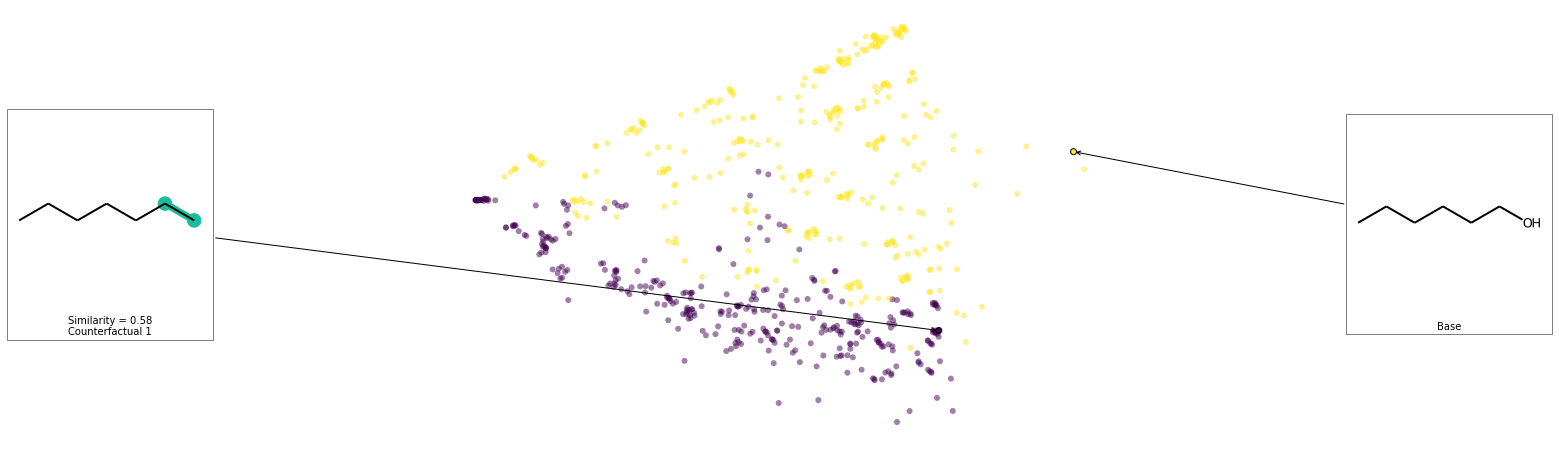

In [19]:
exmol.plot_space(space, cfs)

### Explain using substructures

Now we'll try to explain our model using substructures.

maccs
SMARTS annotations for MACCS descriptors were created using SMARTSviewer (smartsview.zbh.uni-hamburg.de, Copyright: ZBH, Center for Bioinformatics Hamburg) developed by K. Schomburg et. al. (J. Chem. Inf. Model. 2010, 50, 9, 1529â€“1535)


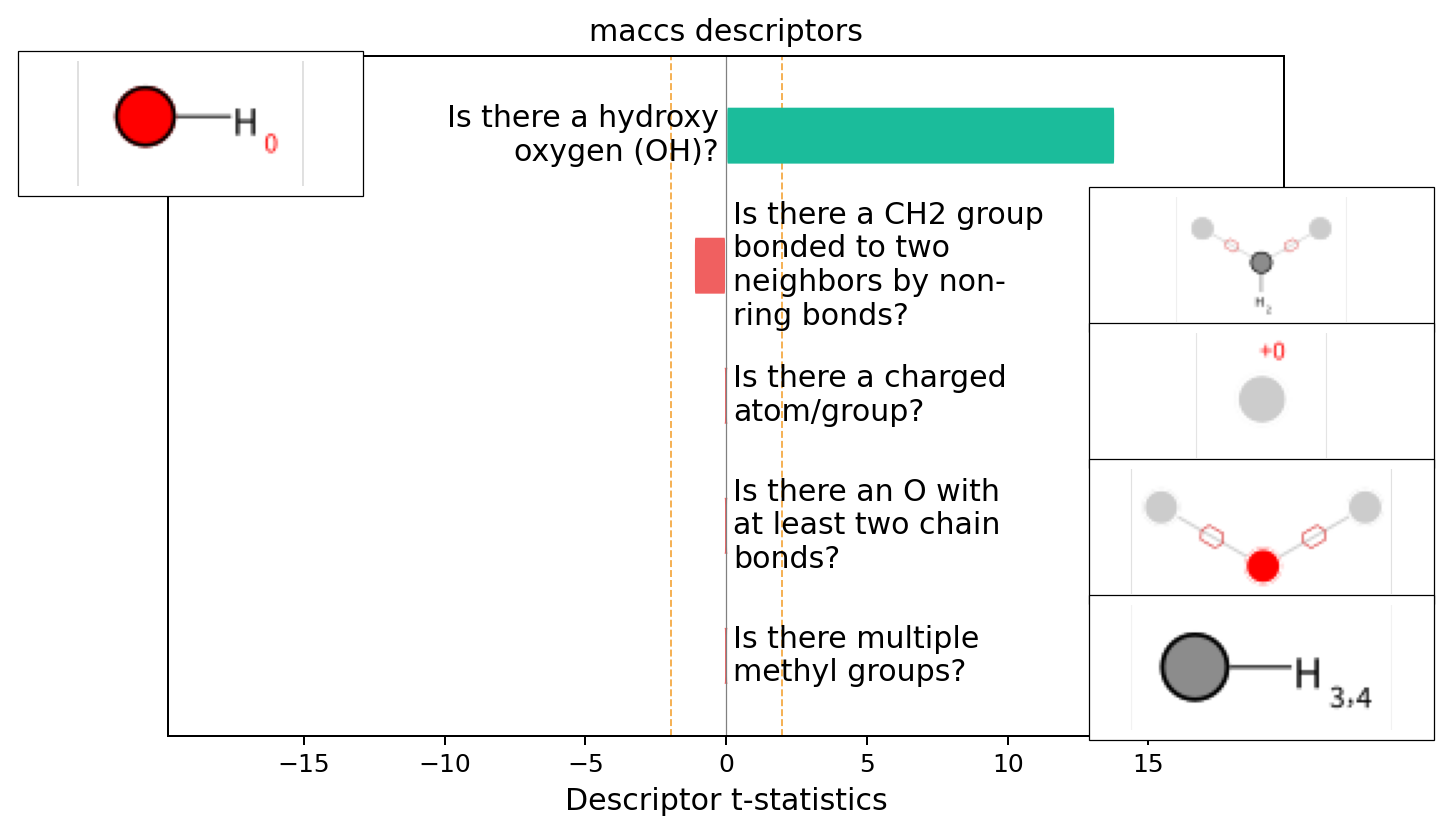

In [21]:
exmol.lime_explain(space)
exmol.plot_descriptors(space)

This seems like a pretty clear explanation. Let's take a look at using substructures that are present in the molecule

ðŸ¤˜DoneðŸ¤˜: 100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 667.0/667 [00:00<00:00, 3291.84it/s]

ecfp


[0,
 -6.730727094929369,
 -6.730727094929369,
 -6.730727094929369,
 -6.730727094929369,
 -6.730727094929369,
 41.54896716397526]

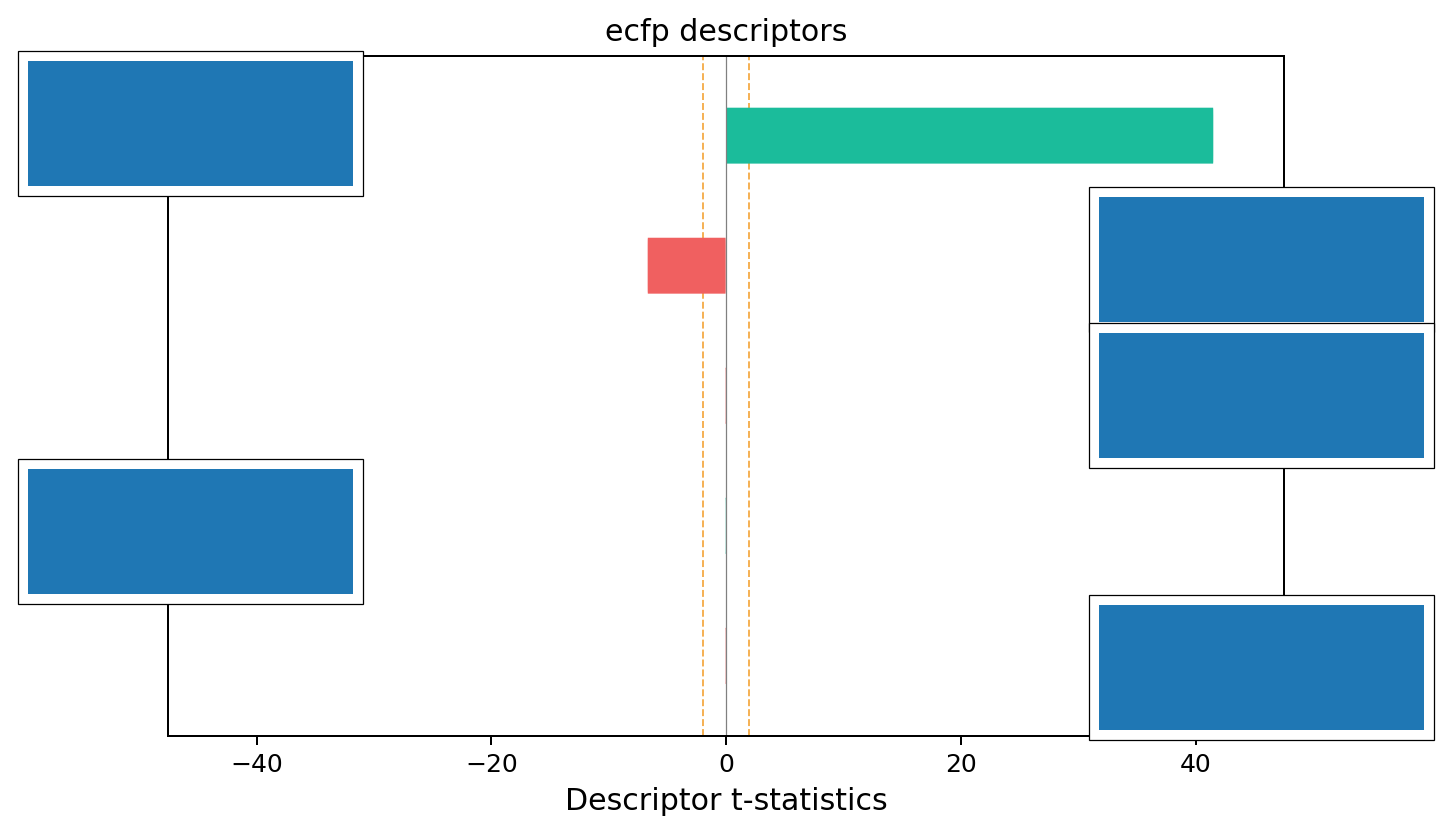

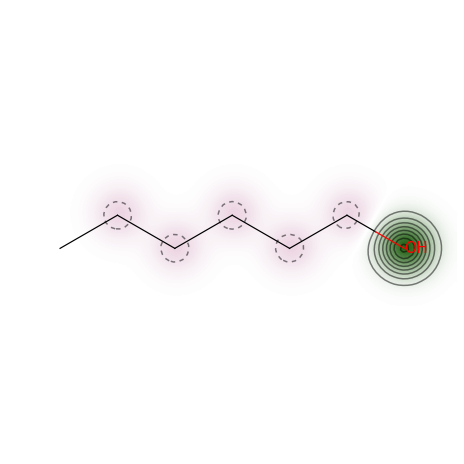

In [20]:
import skunk
exmol.lime_explain(space, descriptor_type='ECFP')
svg = exmol.plot_descriptors(space, return_svg=True)
skunk.display(svg)
exmol.plot_utils.similarity_map_using_tstats(space[0])

We can see that most of the model is explained from the presence of the alcohol group - as expected